In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop(columns='Unnamed: 0',inplace = True)

In [4]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


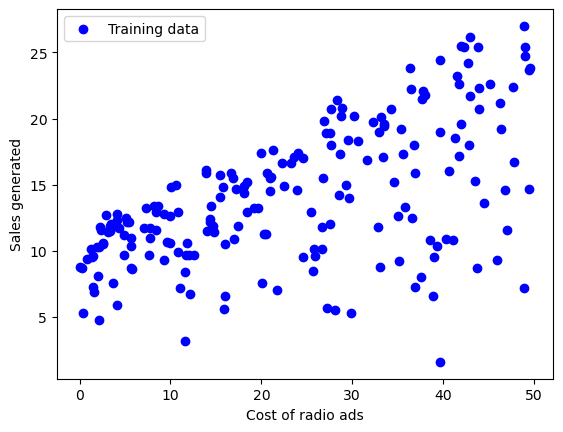

In [5]:
#Determining the dependent and independent varibles --> single linear regression
radio = data['radio'].values
r_sales = data['sales'].values
plt.scatter(radio,r_sales,color="blue",label="Training data")
plt.xlabel("Cost of radio ads")
plt.ylabel("Sales generated")
plt.legend()
plt.show()

In [6]:
#Determining the slope and co-efficient 
mean_radio = radio.mean()
r_sales_mean = r_sales.mean()
print(mean_radio,r_sales_mean)

23.264000000000006 14.0225


In [7]:
n = len(radio)
num= 0
den = 0
for i in range(n):
    num += (radio[i]-mean_radio) * (r_sales[i]-r_sales_mean)
    den += (radio[i] - mean_radio)**2
m = num/den
print("Slope :",m)
c = r_sales_mean - (m*mean_radio)
print("Co-efficient :",c)
#Determining the linear equation
print("The Linear Equation :",m,"*x +",c)

Slope : 0.20249578339243954
Co-efficient : 9.311638095158287
The Linear Equation : 0.20249578339243954 *x + 9.311638095158287


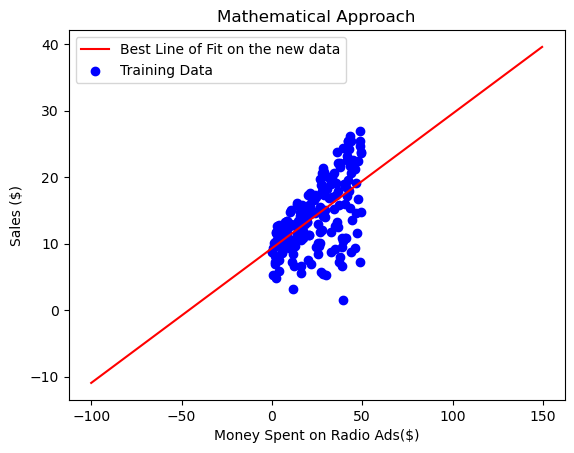

In [8]:
#Visualizing the performance of the model
min_x = np.min(radio) - 100
max_x = np.max(radio) + 100
x = np.linspace(min_x,max_x,1000)
#substitute the above values in the line equaton
y = c + m*x
#plot the graphs for Actual data and the new values
plt.plot(x,y,color='red',label="Best Line of Fit on the new data")
plt.scatter(radio,r_sales,color='blue',label = "Training Data")
plt.xlabel("Money Spent on Radio Ads($)")
plt.ylabel("Sales ($)")
plt.title("Mathematical Approach")
plt.legend()
plt.show()

In [9]:
#Comparing the predictions
print("Training input data:", radio[3])
print("Training output data:", r_sales[3])
yr = m*radio[3] + c
print("Predicted output data:", yr)

Training input data: 41.3
Training output data: 18.5
Predicted output data: 17.67471394926604


In [10]:
#Determining the co-efficient of determination (R-Squared value)
ss_tot = 0
ss_res = 0
n = len(radio)
for i in range(n):
    y_pred = c+m*radio[i]
    ss_tot += (r_sales[i] - r_sales_mean)**2
    ss_res += (y_pred - r_sales[i])**2
r2 = 1-(ss_res/ss_tot)
print("Co-efficient of determination for Radio ads and sales (R-Squared value): ", r2)
print(r2*100,"%")

Co-efficient of determination for Radio ads and sales (R-Squared value):  0.33203245544529514
33.203245544529516 %


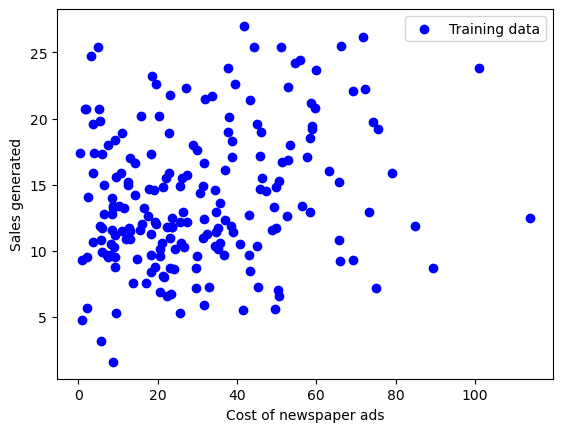

In [11]:
#Determining the dependent and independent varibles --> single linear regression
nsw = data['newspaper'].values
n_sales = data['sales'].values
plt.scatter(nsw,n_sales,color="blue",label="Training data")
plt.xlabel("Cost of newspaper ads")
plt.ylabel("Sales generated")
plt.legend()
plt.show()

In [12]:
#Determining the slope and co-efficient 
mean_nsw = nsw.mean()
n_sales_mean = n_sales.mean()
print(mean_nsw,n_sales_mean)

30.553999999999995 14.0225


In [13]:
n = len(nsw)
num= 0
den = 0
for i in range(n):
    num += (nsw[i]-mean_nsw) * (n_sales[i]-n_sales_mean)
    den += (nsw[i] - mean_nsw)**2
m = num/den
print("Slope :",m)
c = n_sales_mean - (m*mean_nsw)
print("Co-efficient :",c)
#Determining the linear equation
print("The Linear Equation :",m,"*x +",c)

Slope : 0.05469309847227332
Co-efficient : 12.351407069278162
The Linear Equation : 0.05469309847227332 *x + 12.351407069278162


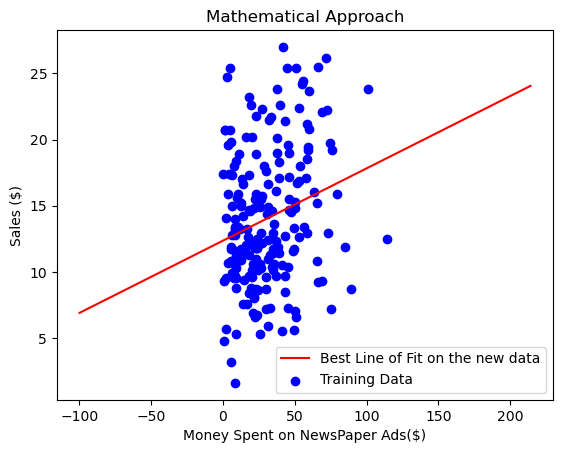

In [14]:
#Visualizing the performance of the model
min_x = np.min(nsw) - 100
max_x = np.max(nsw) + 100
x = np.linspace(min_x,max_x,1000)
#substitute the above values in the line equaton
y = c + m*x
#plot the graphs for Actual data and the new values
plt.plot(x,y,color='red',label="Best Line of Fit on the new data")
plt.scatter(nsw,n_sales,color='blue',label = "Training Data")
plt.xlabel("Money Spent on NewsPaper Ads($)")
plt.ylabel("Sales ($)")
plt.title("Mathematical Approach")
plt.legend()
plt.show()

In [15]:
#Comparing the predictions
print("Training input data:", nsw[3])
print("Training output data:", n_sales[3])
yn = m*radio[3] + c
print("Predicted output data:", yn)

Training input data: 58.5
Training output data: 18.5
Predicted output data: 14.61023203618305


In [16]:
#Determining the co-efficient of determination (R-Squared value)
ss_tot = 0
ss_res = 0
n = len(nsw)
for i in range(n):
    y_pred = c+m*radio[i]
    ss_tot += (r_sales[i] - r_sales_mean)**2
    ss_res += (y_pred - r_sales[i])**2
r2 = 1-(ss_res/ss_tot)
print("Co-efficient of determination for Radio ads and sales (R-Squared value): ", r2)
print(r2*100,"%")

Co-efficient of determination for Radio ads and sales (R-Squared value):  0.14926920358470042
14.926920358470042 %


In [17]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [20]:
radio = pd.DataFrame(data['radio'])
r_sales = pd.DataFrame(data['sales'])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(radio,r_sales,test_size=0.1)
Linear=linear_model.LinearRegression()
Linear.fit(x_train,y_train)
accuracy = Linear.score(x_test,y_test)
print(accuracy)

0.33404622513145676


In [24]:
predict=Linear.predict(x_test)
for i in range(len(predict)):
    print(predict[i],x_test.iloc[i],y_test.iloc[i])

[9.9269853] radio    3.1
Name: 50, dtype: float64 sales    11.4
Name: 50, dtype: float64
[15.40707983] radio    30.2
Name: 176, dtype: float64 sales    20.2
Name: 176, dtype: float64
[10.47297258] radio    5.8
Name: 10, dtype: float64 sales    8.6
Name: 10, dtype: float64
[19.33009953] radio    49.6
Name: 58, dtype: float64 sales    23.8
Name: 58, dtype: float64
[10.29097682] radio    4.9
Name: 196, dtype: float64 sales    9.7
Name: 196, dtype: float64
[10.45275083] radio    5.7
Name: 182, dtype: float64 sales    8.7
Name: 182, dtype: float64
[15.22508407] radio    29.3
Name: 26, dtype: float64 sales    15.0
Name: 26, dtype: float64
[13.60734399] radio    21.3
Name: 184, dtype: float64 sales    17.6
Name: 184, dtype: float64
[14.8004273] radio    27.2
Name: 132, dtype: float64 sales    5.7
Name: 132, dtype: float64
[10.9582946] radio    8.2
Name: 110, dtype: float64 sales    13.4
Name: 110, dtype: float64
[17.44947668] radio    40.3
Name: 148, dtype: float64 sales    10.9
Name: 148, dt